In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" 
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz") 
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path) 
  housing_tgz.extractall(path=housing_path) 
  housing_tgz.close()

In [2]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH): 
  csv_path = os.path.join(housing_path, "housing.csv") 
  return pd.read_csv(csv_path)

In [3]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f746d7b5828>,
      dtype=object)

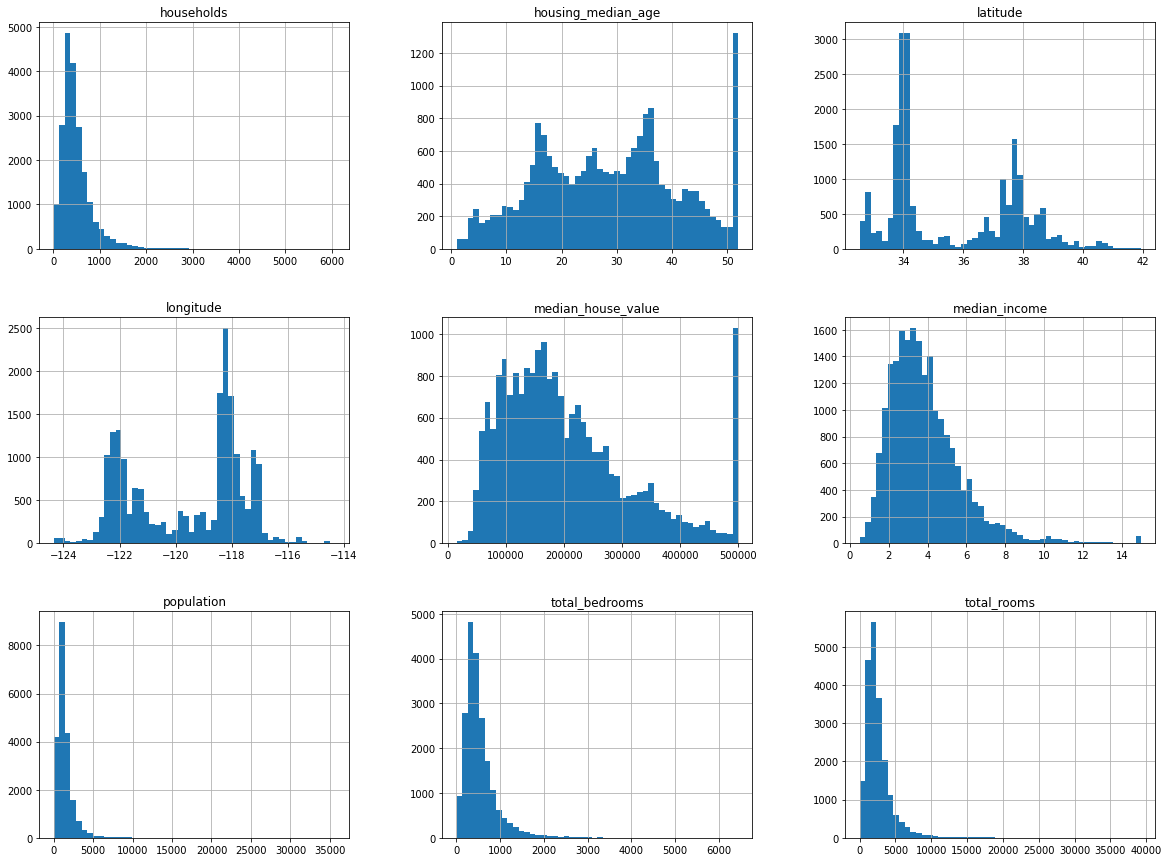

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

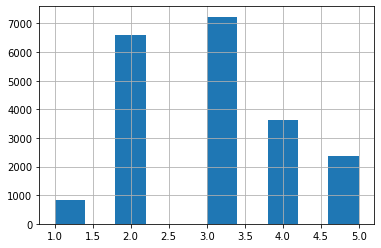

In [ ]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index] 
  strat_test_set = housing.loc[test_index]

In [ ]:
print(strat_test_set["income_cat"].value_counts()/len(strat_test_set))
print(housing["income_cat"].value_counts()/len(housing))
print(strat_test_set["income_cat"].value_counts()/len(strat_test_set) - housing["income_cat"].value_counts()/len(housing))
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(test_set["income_cat"].value_counts()/len(test_set) - housing["income_cat"].value_counts()/len(housing))

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64
3   -0.000048
2   -0.000048
4    0.000048
5    0.000145
1   -0.000097
Name: income_cat, dtype: float64
3    0.007946
2    0.005523
4   -0.008915
5   -0.004942
1    0.000388
Name: income_cat, dtype: float64


In [ ]:
# remove the income_cat attribute - we used it for stratified sampling but don't
# really need it for anything else. Get data back to its original state
for set_ in (strat_test_set, strat_train_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
# copy the data so we can play with it without harming the training set
# note that housing = strat_train_set would just create another reference to the
# same object
housing_explore = strat_train_set.copy()

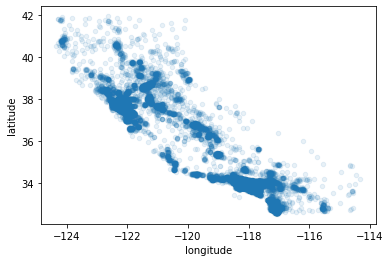

In [ ]:
housing_explore.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

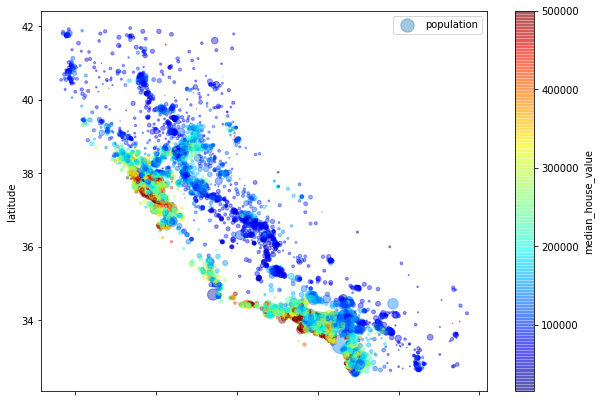

In [ ]:
housing_explore.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing_explore["population"]/100, 
             label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
) 
plt.legend()

In [ ]:
corr_matrix = housing_explore.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


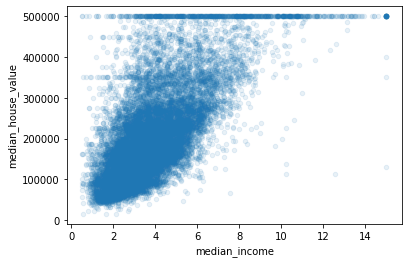

In [ ]:
housing_explore.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [ ]:
# create new features that may be more useful
housing_explore["rooms_per_household"] = housing_explore["total_rooms"]/housing_explore["households"] 
housing_explore["bedrooms_per_room"] = housing_explore["total_bedrooms"]/housing_explore["total_rooms"] 
housing_explore["population_per_household"]=housing_explore["population"]/housing_explore["households"]
corr_matrix = housing_explore.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [ ]:
# revert to a clean training set by copying strat_train_set again
# separate predictors and labels
housing_explore = strat_train_set.drop("median_house_value", axis=1)
housing_explore_labels = strat_train_set["median_house_value"].copy()

In [ ]:
# Use scikit-learn SimpleImputer to assign each attribute's median value to instances missing that attribute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_explore_num = housing_explore.drop("ocean_proximity", axis=1)   # create a copy of housing_explore with only numerical attributes
imputer.fit(housing_explore_num)
X = imputer.transform(housing_explore_num)    # result is a NumPy array
housing_explore_num_tr = pd.DataFrame(X, columns=housing_explore_num.columns, index=housing_explore_num.index)    # transform back into a


In [ ]:
# Use OneHotEncoder to encode categorical variable
from sklearn.preprocessing import OneHotEncoder
housing_explore_cat = housing_explore[["ocean_proximity"]]
cat_encoder = OneHotEncoder()
housing_explore_cat_1hot = cat_encoder.fit_transform(housing_explore_cat)
housing_explore_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
# Create a custom transformer to add the combined attributes we created above
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room 
  def fit(self, X, y=None):
    return self # nothing else to do 
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
    population_per_household = X[:, population_ix] / X[:, households_ix] 
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, 
                   bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_explore_extra_attribs = attr_adder.transform(housing_explore.values)


In [ ]:
# Create pipeline to automate numeric transformations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_explore_num_tr = num_pipeline.fit_transform(housing_explore_num)

In [ ]:
# Create ColumnTransformer to include numerical and categorical transformers in one pipeline
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_explore_num)     # names of numerical attributes
cat_attribs = ["ocean_proximity"]   # names of categorical attributes

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_explore_prepared = full_pipeline.fit_transform(housing_explore)

In [ ]:
# Train linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(housing_explore_prepared, housing_explore_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Evaluate linear regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

housing_explore_predictions = lr.predict(housing_explore_prepared)
print("Training error: ", mean_squared_error(housing_explore_labels, housing_explore_predictions, 
                                             squared=False))
# what is happening here?

def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Stdev: ", scores.std())
  
display_scores(-lr_rmse_scores)

Training error:  68628.19819848923
Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Stdev:  2731.674001798344


In [ ]:
# Linear regression model wasn't great, try decision tree
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(housing_explore_prepared, housing_explore_labels)
housing_explore_predictions = dtr.predict(housing_explore_prepared)
print("Training error: ", mean_squared_error(housing_explore_predictions, housing_explore_labels,
                                             squared=False))
# what is happening here?

Training error:  0.0


In [ ]:
# Try other models such as RandomForestRegressor, SVM with various kernels, 
# NearestNeighbors, AdaBoostRegressor...
# For each model, compare the training error and the validation error to see if 
# the model is over- or under-fitting
# Record your results in the spreadsheet linked from the class website.

# Look in the sklearn documentation to find how to run each model.